# RED NEURONAL ARTIFICIAL
## CHURN MODEL BANK

El objetivo principal de este proyecto es analizar **10.000 datos de clientes en un banco** que tenia una tasa de abandono creciente y así pronosticar que clientes actuales también podrían abandonar dicho banco para así contactar con ellos. De modo que hago un pronóstico usando el módulo **Tensorflow** en Python en el IDE Spyder de Anaconda.


### LIBRERIAS

In [21]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### PATH Y VISUALIZACIÓN DE DATOS

Visualizamos los datos de nuestro dataset y vemos que no tenga valores vacios.

In [22]:
# PATH
path = "C:/Users/USUARIO/Desktop/CursoML/Data/"
data_client= pd.read_csv(path + "Churn_Modelling.csv")
print(data_client.info())  # Son 10.000 datos
print("\n")
print(data_client.head())
print("\n\n" + " VALORES NULOS EN LAS COLUMNAS")
print(data_client.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1 

### PREPROCESADO DE DATOS

Almacenamos solamente las columnas que realmente tienen valores relevantes para nuestro algoritmo ya que por ejemplo las columnas **"RowNumber", "CustomerId" y "Surname"** no van a tener un peso estadístico en el problema y son irrelevantes. Entonces tomamos los siguientes datos:
- La X, con las columnas desde las 3º posición hasta la penúltima. Siendo estos los valores independientes.
- La Y, con la columna de valores booleanos de que un cliente se vaya o no del banco. Siendo este el valor dependiente.

In [23]:
# Preprocesado de Datos
X = data_client.iloc[:, 3:-1].values # Valores independientes como edad, balance, activos, etc
Y = data_client.iloc[:, -1].values # Valor booleano si se van o no, dependiente

### TRANSFORMACIÓN DE DATOS

En nuestro dataset existen variables tipo texto (String) como **"Geography"** y **"Gender"** y hay que transformar este texto en variables categoricas utlizando un codificador para que asi nuestro modelo sea capaz de reconocerlas. En este proyecto se han utilizado 2 formas:
- labelEnconder 
- ColumnTransform

In [24]:
# Transformamos las columna Gender que ahora está en la posición nº2 en el dataset X
print(X)
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [26]:
# MAS NUEVO COLUMTRANSFORMER
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 1.0 ... 1 1 101348.88]
 [1.0 0.0 0.0 ... 0 1 112542.58]
 [1.0 0.0 1.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 1.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 1.0 ... 1 0 38190.78]]


### TRAIN Y TEST

Después de limpiar, preprocesar los datos, considerar que columnas son irrelavantes para nuestro modelo y transformar nuestros dato tipo texto a numérico ahora ya se pasaría a la fase de división de datos, es decir, considerar cuanto porcentaje de datos del dataset sería para entrenar nuestro modelo y el otro para testearlo y verificar su precisión. Normalmente:
- TRAIN, tiene el 80% de datos del dataset original ya que cuanto más datos más comprobaciones realizará y más fiable será.
- TEST, tiene el 20% de datos del dataset original y con él se mide la precisión.

Como sería un proceso muy laborioso hacerlo manualmente con está gran cantidad de datos hay una función en Python del modulo sklearn llamada **train_test_split** que nos facilita esta división de datos.

In [28]:
# Dividimos los datos usando la funcion train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=(0))

# Escalado de variables, para agilizar el resultado 
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

### RED NEURONAL ARTIFICIAL

Cuando ya tenemos nuestro conjunto de datos para entrenar y testear hay que crear nuetro modelo de red neuronal. En este caso, he creado un  modelo secuencial con el modulo **TensorFlow** utilizando **keras**. Creamos sus capas con sus nodos y la función sigmoide de salida que analizará los resultados.

In [29]:
# Construir la red neuronal artificial con keras del modelo secuencial
RNA = tf.keras.models.Sequential()

In [30]:
# Capas de entrada y salida
# 1º Capa de inputs
RNA.add(tf.keras.layers.Dense(units=6, activation='relu'))
# 2º Capa oculta de 6 nodos
RNA.add(tf.keras.layers.Dense(units=6, activation='relu'))
# Ultima capa de salidad, con funcion sigmoide
RNA.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

### ENTRENAMOS EL MODELO

Después de haberse ejecutado nuestro modelo 100 veces, en su última repetición nuestro modelo tiene una precisión para predecir si un cliente se va del dataset train del **86'27%**.
- Epoch 100/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3355 - **accuracy: 0.8627**

In [31]:
# Compilamos y ajustamos el modelo
RNA.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
RNA.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.6354 - accuracy: 0.6464
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4730 - accuracy: 0.8058
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4378 - accuracy: 0.8163
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4232 - accuracy: 0.8224
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4158 - accuracy: 0.8254
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4107 - accuracy: 0.8251
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4060 - accuracy: 0.8276
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4023 - accuracy: 0.8281
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3989 - accuracy: 0.8299
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3947 - accura

### TESTING DEL MODELO ENTRENADO

Con nuestro modelo entrenado ya podemos hacer una predicción de nuestro conjunto de datos de TEST que la RNA no ha analizado en ningun momento y así comprobar con este si realmente funciona correctamente nuestro modelo.

In [35]:
# Prediccion de los resultados
y_pred = RNA.predict(X_test)
y_pred = (y_pred > 0.5) # Cuota intermedia del 50% que podria abandonar y pasamos a bool para comparar con la matriz
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print("\n\n")
#MEJOR VISUALIZARLO EN SPYDER SE VE MEJOR EL CONJUNTO DE DATOS.

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]





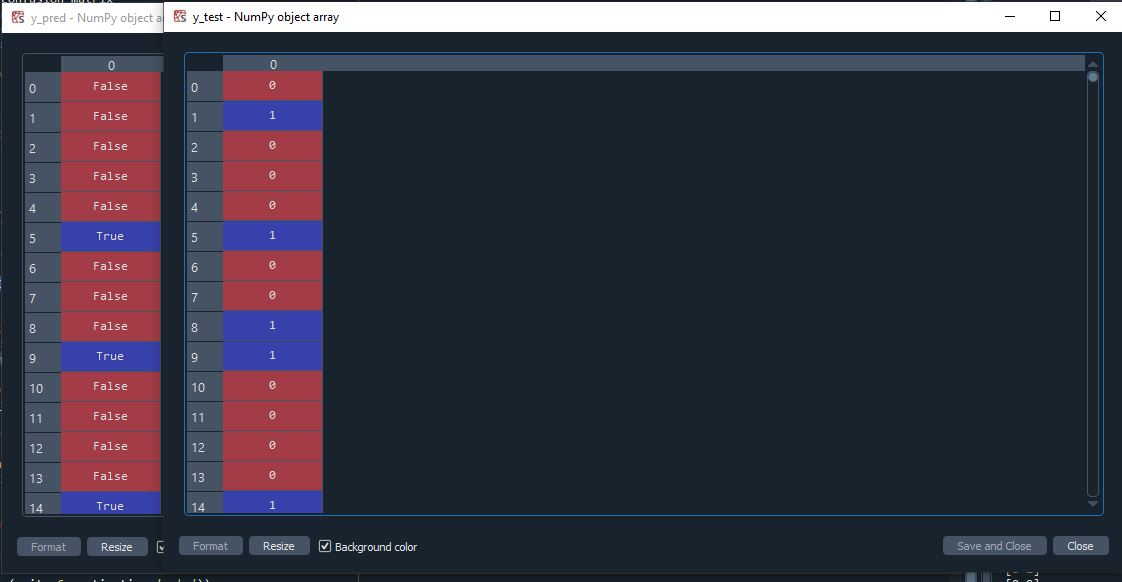

In [1]:
from IPython.display import Image
Image("C:/Users/USUARIO/Desktop/test_pred.jpg")

In [34]:
# Elaborar una matriz de confunsion para evaluar los datos
print('MATRIZ DE CONFUSION')
cm = confusion_matrix(y_test, y_pred)
print(cm)

MATRIZ DE CONFUSION
[[1539   56]
 [ 221  184]]


### Conclusión

Nuestra RNA es capaz de predecir **correctamente** del modelo de testing (alrededor de 2000 datos) que **1539 son verdaderos positivos y 184 son verdaderos negativos siendo predicciones correctas** y **alrededor de 221 y 56 son falsos positivos y negativos** , es decir, ha acertado correctamente 1539+184 clientes (tanto que se quedan como que se iran) de los datos del TEST.

**Autor: Carlos Mir Martínez**

In [39]:
# Precision del testing
print("Precision del Testing " )
(1539+184)/2000 * 100

Precision del Testing 


86.15